From https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [57]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

In [4]:
# Load dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = pandas.read_csv(url, names=names)

cols=['dateTime','Ouverture','Chamb_Temp','Lyon_Temp']
parse_dates = ['dateTime']
#raw_data = pd.read_csv('temperatures2.csv', skiprows=[0],names=cols,decimal=",",sep=";", parse_dates=parse_dates)
dataset = pd.read_csv('compiled.csv',usecols=range(1,6))
dataset.head()

,dateTime,Ouverture,Chamb_Temp,Lyon_Temp,Temp_1H
0,0,0.0,19.200,0.550,0.000
1,3600,0.0,19.200,0.250,0.025
2,7200,0.0,19.225,0.025,0.075
3,10800,0.0,19.300,-0.225,0.000
4,14400,0.0,19.300,-0.400,0.000


In [5]:
# shape
print(dataset.shape)

(1945, 5)


In [6]:
# head
print(dataset.head(20))

    dateTime  Ouverture  Chamb_Temp  Lyon_Temp  Temp_1H
0          0        0.0      19.200      0.550    0.000
1       3600        0.0      19.200      0.250    0.025
2       7200        0.0      19.225      0.025    0.075
3      10800        0.0      19.300     -0.225    0.000
4      14400        0.0      19.300     -0.400    0.000
5      18000        0.0      19.300     -0.625    0.000
6      21600        0.0      19.300     -0.800    0.000
7      25200        0.0      19.300     -0.850    0.000
8      28800        0.0      19.300     -0.650    0.000
9      32400        0.0      19.300     -0.125    0.000
10     36000        0.0      19.300      0.775    0.150
11     39600        0.0      19.450      1.400    0.325
12     43200        0.0      19.775      1.925    0.125
13     46800        0.0      19.900      2.500    0.000
14     50400        0.0      19.900      3.075    0.100
15     54000        0.0      20.000      3.500    0.100
16     57600        0.0      20.100      3.675  

In [7]:
# descriptions
print(dataset.describe())

           dateTime    Ouverture   Chamb_Temp    Lyon_Temp      Temp_1H
count   1945.000000  1945.000000  1945.000000  1945.000000  1945.000000
mean   41629.459126     0.664781    23.906919    -0.777628     0.004961
std    24778.652191     0.472188     2.698837     1.856552     0.162739
min        0.000000     0.000000    17.200000    -6.300000    -1.950000
25%    21600.000000     0.000000    22.050000    -2.075000    -0.075000
50%    43200.000000     1.000000    23.550000    -0.800000     0.000000
75%    63104.000000     1.000000    26.450000     0.725000     0.075000
max    86338.000000     1.000000    29.600000     3.675000     1.375000


In [8]:
# class distribution
print(dataset.groupby('Temp_1H').size())

Temp_1H
-1.950000     1
-1.175000     1
-1.150000     1
-0.925000     1
-0.725000     1
-0.700000     2
-0.650000     1
-0.650000     2
-0.625000     1
-0.600000     2
-0.575000     2
-0.550000     2
-0.525000     1
-0.525000     2
-0.500000     4
-0.475000     4
-0.450000     3
-0.425000     1
-0.400000     4
-0.400000     2
-0.375000     3
-0.350000     2
-0.350000     2
-0.325000     2
-0.325000     3
-0.300000     7
-0.300000     3
-0.275000     2
-0.275000     4
-0.250000    13
             ..
 0.191667     1
 0.200000    42
 0.200000    14
 0.208333     1
 0.225000     8
 0.225000    18
 0.250000    18
 0.275000     9
 0.275000     7
 0.300000     5
 0.300000    16
 0.325000     6
 0.350000     4
 0.350000     3
 0.375000     2
 0.400000     4
 0.400000     2
 0.425000     3
 0.450000     3
 0.475000     3
 0.500000     3
 0.525000     1
 0.525000     1
 0.550000     1
 0.575000     1
 0.600000     2
 0.600000     3
 0.625000     1
 0.675000     1
 1.375000     1
Length: 95, dtyp

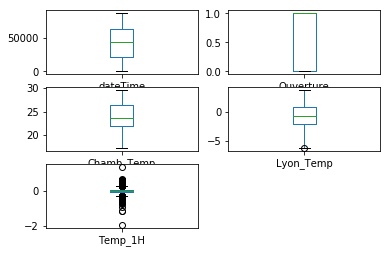

In [11]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.show()

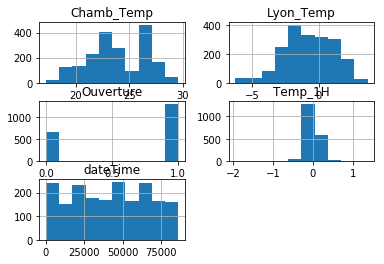

In [12]:
# histograms
dataset.hist()
plt.show()

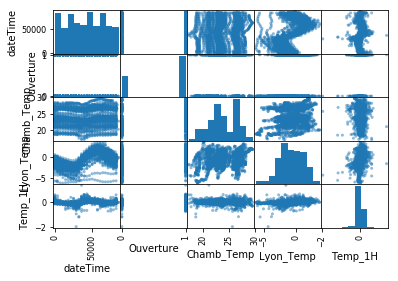

In [13]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [65]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.80
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train, X_validation, Y_train, Y_validation

(array([[ 6.3621e+04,  1.0000e+00,  2.7325e+01,  1.5000e+00],
        [ 6.1200e+04,  1.0000e+00,  2.7400e+01,  2.2500e-01],
        [ 0.0000e+00,  0.0000e+00,  2.1100e+01, -3.3750e+00],
        ...,
        [ 7.2000e+04,  1.0000e+00,  2.3275e+01,  1.4750e+00],
        [ 4.3200e+04,  1.0000e+00,  2.5875e+01,  8.7500e-01],
        [ 3.6000e+03,  0.0000e+00,  2.0875e+01, -3.9250e+00]]),
 array([[ 5.7600e+04,  1.0000e+00,  2.6900e+01,  1.4000e+00],
        [ 5.0400e+04,  1.0000e+00,  2.5750e+01,  1.2500e-01],
        [ 3.6000e+04,  0.0000e+00,  2.2675e+01, -9.5000e-01],
        ...,
        [ 5.7600e+04,  1.0000e+00,  2.4500e+01,  1.3250e+00],
        [ 3.6000e+03,  0.0000e+00,  1.9100e+01, -4.4000e+00],
        [ 2.8800e+04,  1.0000e+00,  2.6550e+01, -2.0000e+00]]),
 array([ 0.      ,  0.075   , -0.1     , -0.05    ,  0.125   ,  0.075   ,
         0.      ,  0.2     ,  0.166667, -0.1     ,  0.      ,  0.075   ,
         0.05    ,  0.      ,  0.6     , -0.225   ,  0.      ,  0.3     ,
    

In [34]:
# Test options and evaluation metric
seed = 7
#scoring = 'accuracy' 
scoring = 'neg_mean_absolute_error'

In [50]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LL', LassoLars()))
models.append(('BR', BayesianRidge()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, random_state=seed) 
    kfold = model_selection.LeaveOneOut()
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.095882 (0.112450)
LL: -0.100724 (0.121615)
BR: -0.095695 (0.112593)
SVM: -0.090602 (0.105437)


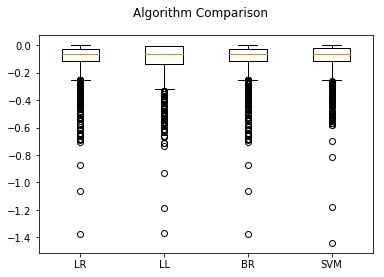

In [51]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [106]:
# Make predictions on validation dataset
lr = LinearRegression()
lerror = []
for i in range(2000):
    lr.fit(X_train, Y_train)
    lerror.append(np.mean(Y_train - lr.predict(X_train)))
predictions = lr.predict(X_validation)
np.concatenate((predictions.reshape(predictions.shape[0],1),Y_validation.reshape(Y_validation.shape[0],1)),axis=1)
#np.mean(predictions-Y_validation)

array([[ 0.04384112,  0.1       ],
       [ 0.01985015,  0.25      ],
       [ 0.00960576, -0.05      ],
       ...,
       [ 0.06872094,  0.075     ],
       [-0.04418355, -0.1       ],
       [-0.04662151, -0.475     ]])

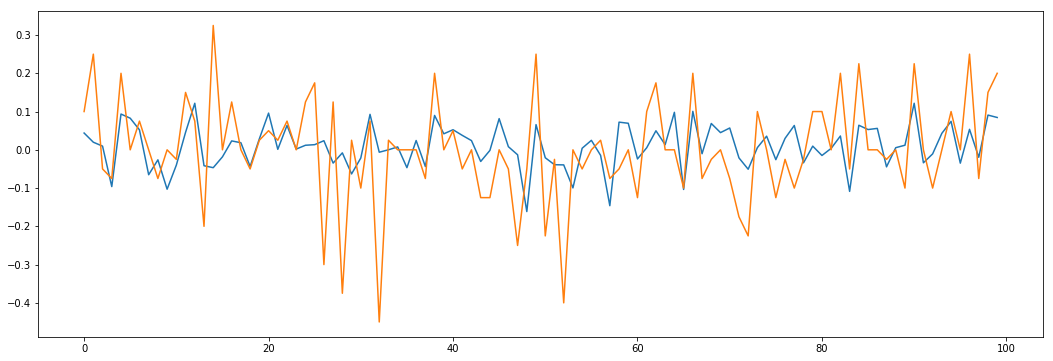

In [99]:
plt.rcParams["figure.figsize"] = [18,6]
plt.plot(range(Y_validation.shape[0])[0:100],predictions[0:100],Y_validation[0:100])

In [94]:
lr.predict(np.array([[15*3600,0,25,-3]]))

array([-0.08979744])

In [101]:
np.mean(Y_train - lr.predict(X_train))

5.33706184074304e-17

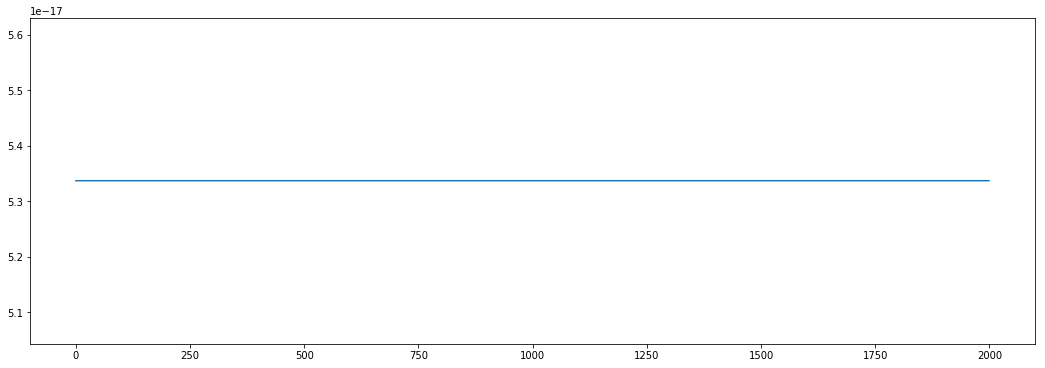

In [107]:
plt.plot(range(len(lerror)),lerror)